In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

/home/pankajmehar/miniconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



# How to predict the revenue


In [2]:
#lets load dataset
df = pd.read_csv("/media/pankajmehar/Linux/task_immpossible/prediction /movie_metadata.csv")

In [3]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.shape

(5043, 28)

In [5]:
df.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

# Exploratory Data Analysis

In [6]:
Dtype = df.columns.to_series().groupby(df.dtypes).groups
Dtype

{dtype('int64'): Index([u'num_voted_users', u'cast_total_facebook_likes',
        u'movie_facebook_likes'],
       dtype='object'),
 dtype('float64'): Index([u'num_critic_for_reviews', u'duration', u'director_facebook_likes',
        u'actor_3_facebook_likes', u'actor_1_facebook_likes', u'gross',
        u'facenumber_in_poster', u'num_user_for_reviews', u'budget',
        u'title_year', u'actor_2_facebook_likes', u'imdb_score',
        u'aspect_ratio'],
       dtype='object'),
 dtype('O'): Index([u'color', u'director_name', u'actor_2_name', u'genres', u'actor_1_name',
        u'movie_title', u'actor_3_name', u'plot_keywords', u'movie_imdb_link',
        u'language', u'country', u'content_rating'],
       dtype='object')}

In [7]:
null_values = df.isnull().sum()
null_values

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [8]:
df.aspect_ratio.unique()

array([ 1.78,  2.35,   nan,  1.85,  2.  ,  2.2 ,  2.39,  2.24,  1.33,
        4.  ,  1.66,  1.5 , 16.  ,  1.77,  2.4 ,  1.37,  2.76,  1.18,
        1.44,  2.55,  1.2 ,  1.75,  1.89])

In [9]:
df.drop('aspect_ratio', axis = 1)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,10000


In [10]:
df.corr(method = 'pearson')

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,-0.049786,0.683176
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.131673,0.261662,-0.090071,0.196605
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.119601,0.170802,0.001642,0.162048
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,-0.003366,0.278844
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,-0.020049,0.135348
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,-0.027755,0.559958,0.102179,0.030886,0.262768,0.198021,0.069346,0.378082
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,-0.014761,0.537924
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.247400,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.628404,0.085787,-0.017885,0.209786
facenumber_in_poster,-0.033897,0.013469,-0.041268,0.099368,0.072257,-0.027755,-0.026998,0.091475,1.000000,-0.069018,-0.019559,0.061504,0.071228,-0.062958,0.013713,0.008918
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.219496,0.292475,-0.024719,0.400594


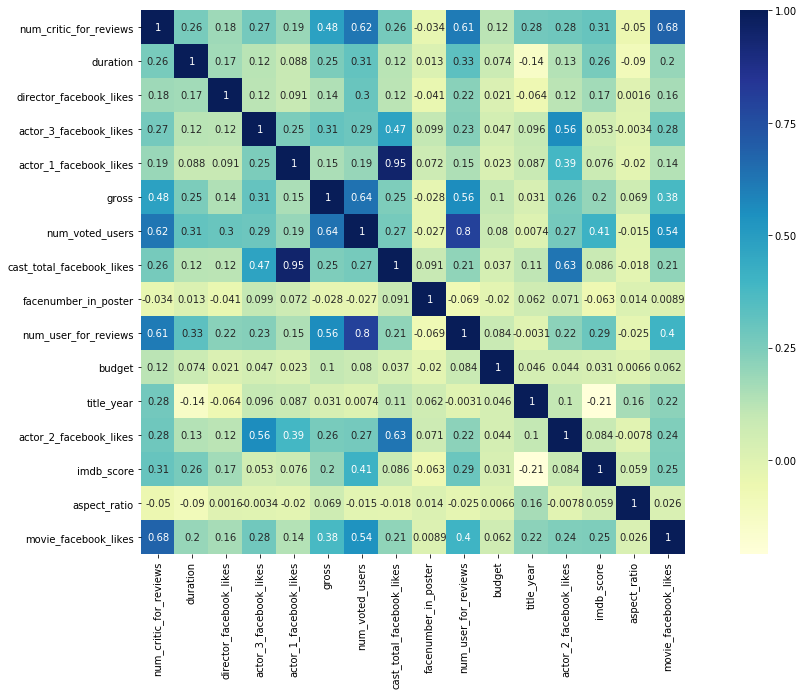

In [11]:
corr_mat= df.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='YlGnBu')

In [12]:
df.drop('facenumber_in_poster', axis = 1, inplace = True)

In [13]:
#sorting based on gross
gross_revenue= df.sort_values(['gross'], ascending=False)
#lets find how many of them were blockbuster
block_buster = gross_revenue.query('(gross > 500000000)')
print('number of movies having gross 500 million and above:')
len(block_buster)

number of movies having gross 500 million and above:


6

In [14]:
block_buster_1 = gross_revenue.query('(gross > 50000000)')
print('number of movies having gross 50 million and above:')
len(block_buster_1)

number of movies having gross 50 million and above:


1303

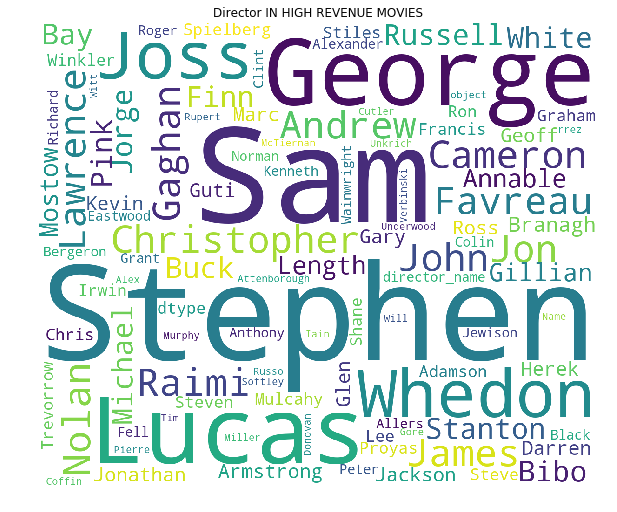

In [15]:
plt.subplots(figsize=(10,10))
text = (str(block_buster_1['director_name']))
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Director IN HIGH REVENUE MOVIES')
plt.axis('off')
plt.show()

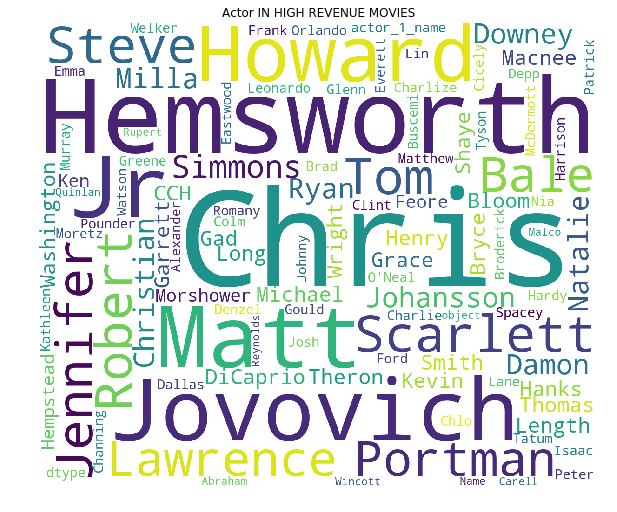

In [16]:
plt.subplots(figsize=(10,10))
text = (str(block_buster_1['actor_1_name']))
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Actor IN HIGH REVENUE MOVIES')
plt.axis('off')
plt.show()

In [17]:
# I would like to check the relation between 'director' and 'gross' and 'imdb_score
#Same I would like to check for 'actor' and 'gross' and 'imdb_score
# for my safe bet I like to see who's the real moneymaker  of hollywood
director_gross_imdb = df.groupby('director_name')['gross', 'imdb_score'].agg('max')
director_gross_imdb.head(20)

,gross,imdb_score
director_name,,
A. Raven Cruz,NaN,1.9
Aaron Hann,NaN,6.0
Aaron Schneider,9176553.0,7.1
Aaron Seltzer,48546578.0,2.7
Abel Ferrara,1227324.0,6.6
Adam Brooks,31973840.0,7.2
Adam Carolla,105943.0,6.1
Adam Goldberg,2580.0,5.4
Adam Green,NaN,5.7


In [18]:
actor_gross_imdb = df.groupby('actor_1_name')['gross', 'imdb_score'].agg('mean')
actor_gross_imdb.head(5)

,gross,imdb_score
actor_1_name,,
50 Cent,30981850.0,5.000000
A.J. Buckley,123070338.0,6.800000
Aaliyah,30307804.0,5.200000
Aasif Mandvi,13214030.0,6.700000
Abbie Cornish,25034383.0,7.066667


In [19]:
director_score = df['imdb_score'].groupby(df['director_name']).mean()
director_score = director_score.to_frame(name= 'imdb_score')

In [20]:
#10 director with highest sum imdb_score
(director_score.sort_values('imdb_score', ascending = False)).head(10)

,imdb_score
director_name,
John Blanchard,9.5
Sadyk Sher-Niyaz,8.7
Cary Bell,8.7
Mitchell Altieri,8.7
Mike Mayhall,8.6
Charles Chaplin,8.6
Ron Fricke,8.5
Majid Majidi,8.5
Raja Menon,8.5


In [21]:
#10 actor with highest sum imdb_score
actor_score = df['imdb_score'].groupby(df['actor_1_name']).mean()
actor_score = actor_score.to_frame(name= 'imdb_score')
(actor_score.sort_values('imdb_score', ascending = False)).head(10)

,imdb_score
actor_1_name,
Krystyna Janda,9.1
Jack Warden,8.9
Rob McElhenney,8.8
Maria Pia Calzone,8.7
Elina Abai Kyzy,8.7
Kimberley Crossman,8.7
Abigail Evans,8.7
Takashi Shimura,8.7
Jackie Gleason,8.7


In [22]:
# Let's see which genres have much money:genres_money
genres_money = df.groupby('genres')['gross', 'imdb_score'].sum()
genres_money = genres_money.sort_values(['gross'], ascending=False)

In [23]:
top20_genres_money_gross = genres_money['gross'].sort_values(ascending=False).head(20)
top20_genres_money_gross

genres
Action|Adventure|Sci-Fi                      9.290409e+09
Comedy                                       6.734155e+09
Comedy|Romance                               6.371779e+09
Comedy|Drama|Romance                         5.118714e+09
Action|Adventure|Thriller                    4.612288e+09
Adventure|Animation|Comedy|Family|Fantasy    3.992613e+09
Drama|Romance                                3.805566e+09
Action|Adventure|Sci-Fi|Thriller             3.677153e+09
Comedy|Drama                                 3.644047e+09
Action|Adventure|Fantasy|Sci-Fi              3.560217e+09
Action|Adventure|Fantasy                     3.364768e+09
Action|Crime|Thriller                        3.117601e+09
Drama                                        3.020150e+09
Crime|Drama|Thriller                         2.798490e+09
Adventure|Animation|Comedy|Family            2.652269e+09
Adventure|Family|Fantasy                     2.402750e+09
Action|Comedy|Crime                          1.999627e+09
Action|

In [24]:
top20_genres_money_gross_name = dict(top20_genres_money_gross)
list_top20_genres = [key for key in top20_genres_money_gross_name.keys()]
list_top20_genres = [genre.split("|") for genre in list_top20_genres]

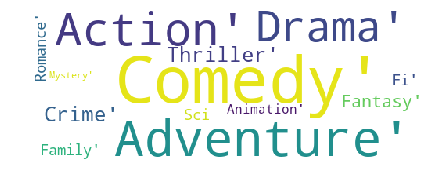

'People most pay for Action, Adventure, Comedy, Drama, Thriller and Crime. this category is safe bet for me))'

In [25]:
# Creating a word cloud of the top genres
tagsString = str(list_top20_genres)
top20_genres_name = WordCloud(background_color='white', width=500, height=200).generate(tagsString)
plt.rcParams["figure.figsize"] = [7,7]
plt.imshow(top20_genres_name)
plt.axis('off')
plt.show()

"""People most pay for Action, Adventure, Comedy, Drama, Thriller and Crime. this category is safe bet for me))"""

In [26]:
movie_fb_likes = df.groupby('movie_title')['gross', 'movie_facebook_likes'].agg('sum')

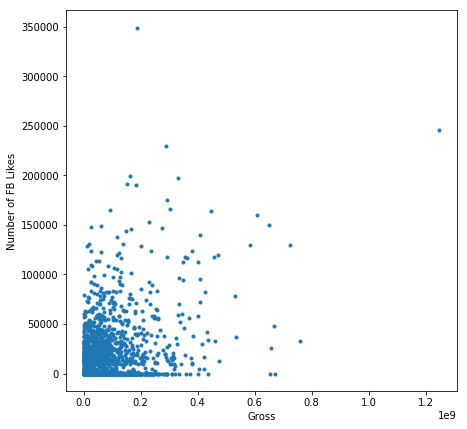

'There is relation between FB like and Gross revenue, there is some outlier which is exceptional '

In [27]:
# Vizulisation to explore dependent
plt.scatter(movie_fb_likes['gross'], movie_fb_likes['movie_facebook_likes'], marker='.')
plt.xlabel('Gross')
plt.ylabel('Number of FB Likes')
plt.show()
"""There is relation between FB like and Gross revenue, there is some outlier which is exceptional """

# Feature Engineering

In [28]:
# Remove all movies made outside the USA
df = df.drop(df[df.country != 'USA'].index)
# Any block with missing information is dropped
df.dropna()

# Subtract budget from gross to calculate profits and add it as a new feature
df['profit'] = np.subtract(df['gross'].values, df['budget'].values)
df['profitpercent'] = np.subtract(df['gross'].values, df['budget'].values)
df['profitpercent'] = np.divide(df['profitpercent'].values, df['gross'].values)
df['profitpercent'] = np.multiply(df['profitpercent'].values, 100)
df = df.fillna(0)
df.shape

(3807, 29)

# Machine Learning 

In [29]:
def profit_numeric(x):
    int(x)
    if x == 0:      # If profit = 0
        return 0
    elif x < 0:     # If profit < 0
        return 1
    elif x > 0:     # If profit > 0
        return 2
    
df['encoded_value'] = df['profit'].apply(profit_numeric)
df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,profitpercent,encoded_value
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,68.836532,2
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.039439,2
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,44.212697,2
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-260.942743,1
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0,23.335284,2


In [30]:
X = df[['imdb_score', 'budget', 'duration', 'movie_facebook_likes','actor_1_facebook_likes', 'num_critic_for_reviews', 'num_user_for_reviews', 'num_voted_users']]
y = df['encoded_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
knnPredict = knn.predict(X_test)
knnScore = accuracy_score(y_test, knnPredict)
print(knnScore)

0.5984251968503937


In [32]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logregPredict = logreg.predict(X_test)
logregScore = accuracy_score(y_test, logregPredict)
print(logregScore)

0.5923009623797025


In [33]:
decisiontree = DecisionTreeClassifier(random_state = 2)
decisiontree.fit(X_train, y_train)
dectreePredict = decisiontree.predict(X_test)
dectreeScore = accuracy_score(y_test, dectreePredict)
print(dectreeScore)

0.642169728783902


In [34]:
randomforest = RandomForestClassifier(n_estimators=19, bootstrap=True, random_state=2)
randomforest.fit(X_train, y_train)
forestPredict = randomforest.predict(X_test)
forestScore = accuracy_score(y_test, forestPredict)
print(forestScore)

0.7016622922134733
